<a href="https://colab.research.google.com/github/Yogesh-dahake08/Web-Scraping/blob/main/Web_Scraping_Assignment_%7C%7C_Numerical_Programming_in_Python_Analyze_it_Yourself%7C%7CYOGESH_DAHAKE_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






#Scraping LinkedIn Job Data Using Selenium and BeautifulSoup

##Install Necessary Packages

In [ ]:
#Install Necessary Packages
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install bs4

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,326 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,046 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/unive

##Import Necessary Module

In [ ]:
#Import Necessary Modules for Scraping
import requests
from bs4 import BeautifulSoup

#Import Necessary datetime module
from datetime import datetime
import pytz
import time

#Import Necessary Module to interact with page
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

##Chrome options setup

In [ ]:
#Set up of Chrome options
options = Options()
options.add_argument("--no-sandbox")
options.add_argument("--headless=new")

options.headless = True

##Generalize the form of URL and Scraping data

In [ ]:
def get_url(position, location):
  #form URL structure and return
    source = 'https://www.linkedin.com/jobs/search?keywords={}&location={}&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    url = source.format(position, location)
    return url

def get_data(div, link):
  #General form of scrape the data
    job_link = link.get('href')
    job_title = div.h3.text.strip()
    try:
      company_name = div.find('a', 'hidden-nested-link').text.strip()
    except AttributeError:
      company_name = ''
    job_location = div.find('span', 'job-search-card__location').text.strip()

    try:
        salary_element = div.find('span', 'job-search-card__salary-info').text.replace('\n', '').strip()
        job_salary = ''.join(salary_element.split())
    except AttributeError:
        job_salary = 'Salary information is not available'

    try:
        status = div.find('span', 'result-benefits__text').text.strip()
    except AttributeError:
        status = 'Not updated'

    post_date = div.find('time').get('datetime')

    local_tm = pytz.timezone('Asia/Kolkata')
    today = datetime.now(local_tm).strftime('%Y-%m-%d')

    record = (job_title, company_name, job_location, job_link, job_salary, status, post_date, today)
    return record

##Selenium to scroll page and scrape with BeautifulSoup

In [ ]:
def main():
    URL = get_url('Data Science jobs', 'India')
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.62'}

    # Initialize driver
    driver = webdriver.Chrome(options=options)
    driver.get(URL)

    # Scroll down the page to get maximum data
    scroll_pause_time = 7
    last_height = driver.execute_script("return document.body.scrollHeight")

    records = []

    try:
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(scroll_pause_time)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
    except:
        pass

    # Passsing the page_source with 'html.parser' in BeautifulSoup
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    divs = soup.find_all('div', 'base-search-card__info')
    all_job_link = soup.find_all('a', class_='base-card__full-link')

    for item1, item2 in zip(divs, all_job_link):
        records.append(get_data(item1, item2))

    driver.quit()

    # print the total records
    print(len(records), "jobs scraped.")

    return records


##Scrape the data and Process the Data

In [ ]:
# Now process the records as needed, e.g., write to CSV
import csv

# Get the records
if __name__ == '__main__':
  records = main()
  # csv file path
  csv_file_path = 'linkedin_job_records.csv'

  # Column names
  column_names = ['Job Title', 'Company', 'Location', 'Link', 'Salary', 'Status', 'Post Date', 'Today Date']

  # Write records to CSV file
  with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow(column_names)
      writer.writerows(records)

  print(f"CSV file '{csv_file_path}' created successfully.")

175 jobs scraped.
CSV file 'linkedin_job_records.csv' created successfully.


##Analyzing the Data using libraries

In [ ]:
import pandas as pd
import numpy as np


# Read the csv file into Dataframe
linkedin_df = pd.read_csv('/content/linkedin_job_records.csv')

# Display the first few rows of the DataFrame
linkedin_df.head()

,Job Title,Company,Location,Link,Salary,Status,Post Date,Today Date
0,Data Analyst - R/Python,Xpressbees (BusyBees Logistics Solutions Pvt. ...,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/data-analyst...,Salary information is not available,Actively Hiring,2023-11-01,2023-12-22
1,AI Assurance,Deloitte,"Bengaluru, Karnataka, India",https://in.linkedin.com/jobs/view/ai-assurance...,Salary information is not available,Actively Hiring,2023-12-13,2023-12-22
2,AI Assurance,Deloitte,"Bengaluru, Karnataka, India",https://in.linkedin.com/jobs/view/ai-assurance...,Salary information is not available,Actively Hiring,2023-12-06,2023-12-22
3,"Analyst (Full Time, Remote)",Hike,"Delhi, India",https://in.linkedin.com/jobs/view/analyst-full...,Salary information is not available,Not updated,2023-11-06,2023-12-22
4,Business Analytics - Artificial Intelligence /...,LTIMindtree,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/business-ana...,Salary information is not available,Actively Hiring,2023-11-28,2023-12-22


##Cleaning the data


In [ ]:
# Data Cleaning
# Drop rows with missing values in key columns
column_cleaned = linkedin_df.dropna(subset=['Job Title', 'Company', 'Location'])

In [ ]:
# Replace 'Salary information is not available' with NaN
column_cleaned['Salary'] = column_cleaned['Salary'].replace('Salary information is not available', np.nan)

# Convert 'Post Date' and 'Today Date' to datetime objects
column_cleaned['Post Date'] = pd.to_datetime(column_cleaned['Post Date'])
column_cleaned['Today Date'] = pd.to_datetime(column_cleaned['Today Date'])

# Calculate the age of the job posting
column_cleaned['Job Age'] = (column_cleaned['Today Date'] - column_cleaned['Post Date']).dt.days


# Extract year and month from 'Post Date'
column_cleaned['Post Year'] = column_cleaned['Post Date'].dt.year
column_cleaned['Post Month'] = column_cleaned['Post Date'].dt.month

##Analyzing Data

In [ ]:
# Data Analysis
# Job count by location
job_count_by_location = column_cleaned['Location'].value_counts()

# Print analysis results
print("\nJob count by location:")
job_count_by_location


Job count by location:


Bengaluru, Karnataka, India                  39
Mumbai, Maharashtra, India                   19
Pune, Maharashtra, India                     18
India                                        17
Bangalore Urban, Karnataka, India             9
Chennai, Tamil Nadu, India                    9
Hyderabad, Telangana, India                   8
Gurugram, Haryana, India                      6
Bengaluru North, Karnataka, India             5
Kochi, Kerala, India                          4
Gurgaon, Haryana, India                       4
Delhi, India                                  3
Noida, Uttar Pradesh, India                   3
Panaji, Goa, India                            3
Bengaluru East, Karnataka, India              3
Delhi, Delhi, India                           2
Greater Delhi Area                            2
Lucknow, Uttar Pradesh, India                 2
Coimbatore, Tamil Nadu, India                 2
Pune/Pimpri-Chinchwad Area                    2
Gwalior, Madhya Pradesh, India          

In [ ]:
# Average salary (excluding missing values)
column_cleaned['Salary'] = column_cleaned['Salary'].str.replace('[^0-9]', '', regex=True).astype(float)
average_salary = column_cleaned['Salary'].mean()

print("\nAverage salary:")
print(average_salary)


Average salary:
7282226189722.465


In [ ]:
# Calculate average salary for each job title
average_salary_by_title = column_cleaned.groupby('Job Title')['Salary'].mean()

highest_avg_salary = average_salary_by_title.dropna().max()
highest_avg_salary_job_title = average_salary_by_title.dropna().idxmax()

# Find the company name, location, and job age associated with the highest average salary
highest_avg_salary_info = column_cleaned[column_cleaned['Job Title'] == highest_avg_salary_job_title].iloc[0]
highest_avg_salary_company = highest_avg_salary_info['Company']
highest_avg_salary_location = highest_avg_salary_info['Location']
highest_avg_salary_job_age = highest_avg_salary_info['Job Age']

print(f"Highest Average Salary: {highest_avg_salary:.2f}")
print(f"Job Title with Highest Average Salary: {highest_avg_salary_job_title}")
print(f"Company Name: {highest_avg_salary_company}")
print(f"Location: {highest_avg_salary_location}")
print(f"Job Age: {highest_avg_salary_job_age} days")

Highest Average Salary: 20000003000000.00
Job Title with Highest Average Salary: AI/ML Engineer (Data science)
Company Name: Nilasu Consulting Services Pvt. Ltd.
Location: Pune, Maharashtra, India
Job Age: 32 days


In [ ]:
# Calculate the frequency of each job title based on the "Post Date" column
job_title_frequencies = column_cleaned.groupby('Job Title')['Post Date'].count()

# Display the job titles with the most vacancies along with their company names and post dates (within 7 days)
print("\nThe job titles with the most vacancies along with their company names and post dates (within 7 days)")
top_job_titles = job_title_frequencies.sort_values(ascending=False).head(10).index
for job_title in top_job_titles:
    job_title_data = column_cleaned[column_cleaned['Job Title'] == job_title]
    recent_post_dates = job_title_data[job_title_data['Job Age'] <= 7]['Post Date']

    if not recent_post_dates.empty:
        print(f"Job Title: {job_title}")
        print(f"Company Name: {job_title_data.iloc[0]['Company']}")
        print("Post Dates (within 7 days):")
        print(recent_post_dates)
        print("\n")


The job titles with the most vacancies along with their company names and post dates (within 7 days)
Job Title: Data Scientist
Company Name: Jar
Post Dates (within 7 days):
42    2023-12-21
45    2023-12-21
87    2023-12-21
118   2023-12-22
123   2023-12-15
131   2023-12-18
137   2023-12-15
165   2023-12-21
Name: Post Date, dtype: datetime64[ns]


Job Title: AI/ML Developer
Company Name: Kaara
Post Dates (within 7 days):
164   2023-12-15
Name: Post Date, dtype: datetime64[ns]




In [ ]:
# Sort the DataFrame in ascending order of 'Job Age'
most_recently_updated_jobs = column_cleaned.sort_values(by='Job Age')

# Display the most recently updated jobs (top 10)
print("\nThe most recently updated jobs (top 10)")
most_recently_updated_jobs[['Job Title', 'Company', 'Location', 'Job Age']].head(10)


The most recently updated jobs (top 10)


,Job Title,Company,Location,Job Age
116,Software Engineer - Python,A.P. Moller - Maersk,"Bengaluru, Karnataka, India",0
118,Data Scientist,A.P. Moller - Maersk,"Bengaluru, Karnataka, India",0
87,Data Scientist,Sidel,"Pune, Maharashtra, India",1
57,AI/ML Engineer - Lead,Infosys,"Bengaluru, Karnataka, India",1
68,AI/ML Engineer - Senior Lead,Infosys,"Bengaluru, Karnataka, India",1
78,AI/ML Engineer - Manager,Infosys,"Bengaluru, Karnataka, India",1
45,Data Scientist,IBM,"Bengaluru East, Karnataka, India",1
42,Data Scientist,PGP Glass Pvt. Ltd.,"Vadodara, Gujarat, India",1
133,Senior Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",1
135,Artificial Intelligence Role,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...","Mumbai, Maharashtra, India",1


##Visualization charts using the matplotlib and seaborn libraries based on analysis

In [ ]:
# Install and Import Necessary libraries
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

###1.Job count by location

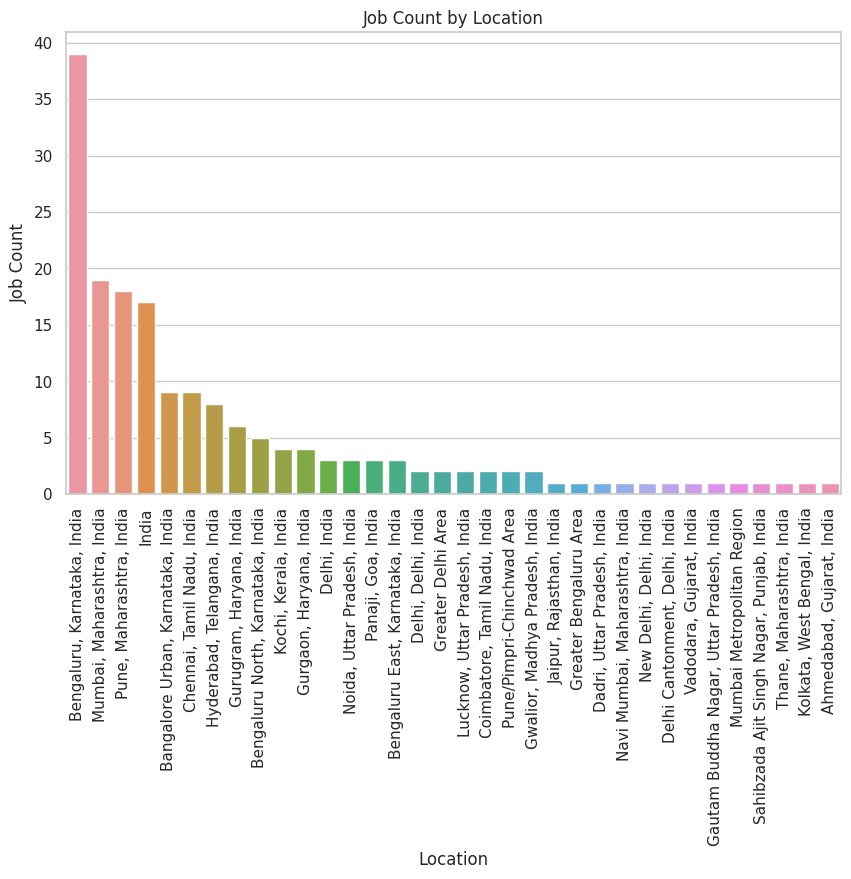

In [ ]:
# Create a bar chart for job count by location
plt.figure(figsize=(10, 6))
sns.barplot(x=job_count_by_location.index, y=job_count_by_location.values)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Job Count')
plt.title('Job Count by Location')
plt.show()

###2.Salary distribution

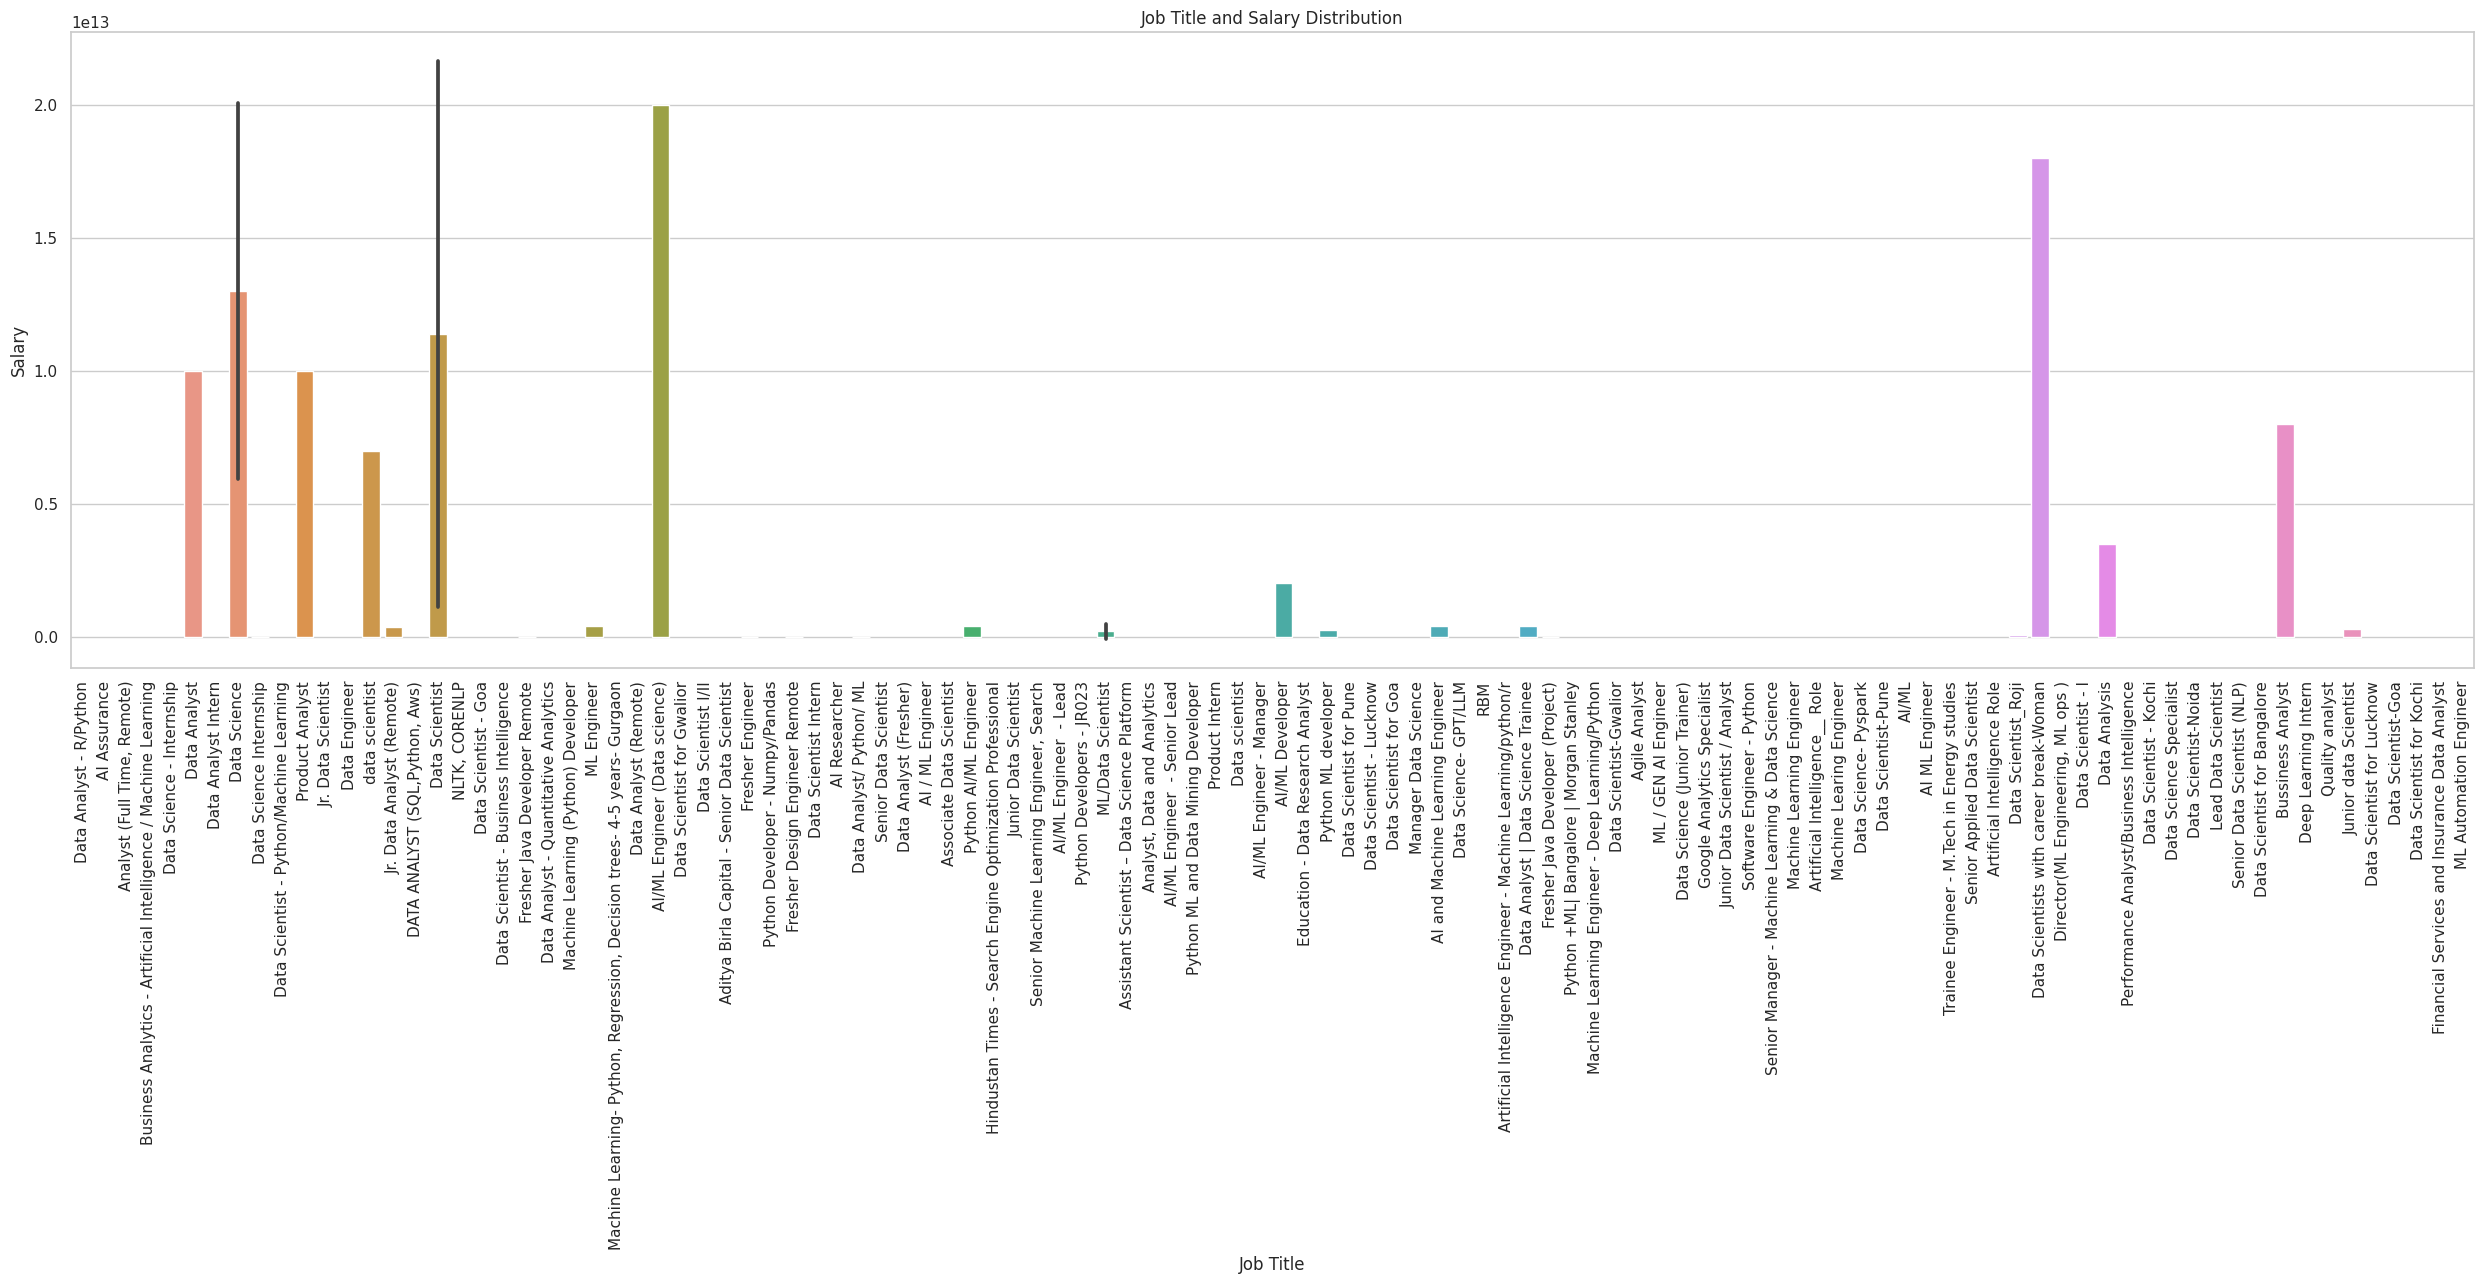

In [ ]:
# Create a bar chart for job titles and their corresponding salary ranges
plt.figure(figsize=(25, 13))
sns.barplot(x=column_cleaned['Job Title'], y=column_cleaned['Salary'], errorbar='sd')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Job Title and Salary Distribution')
plt.tight_layout()
plt.show()

###3.Job type with the highest paying locations

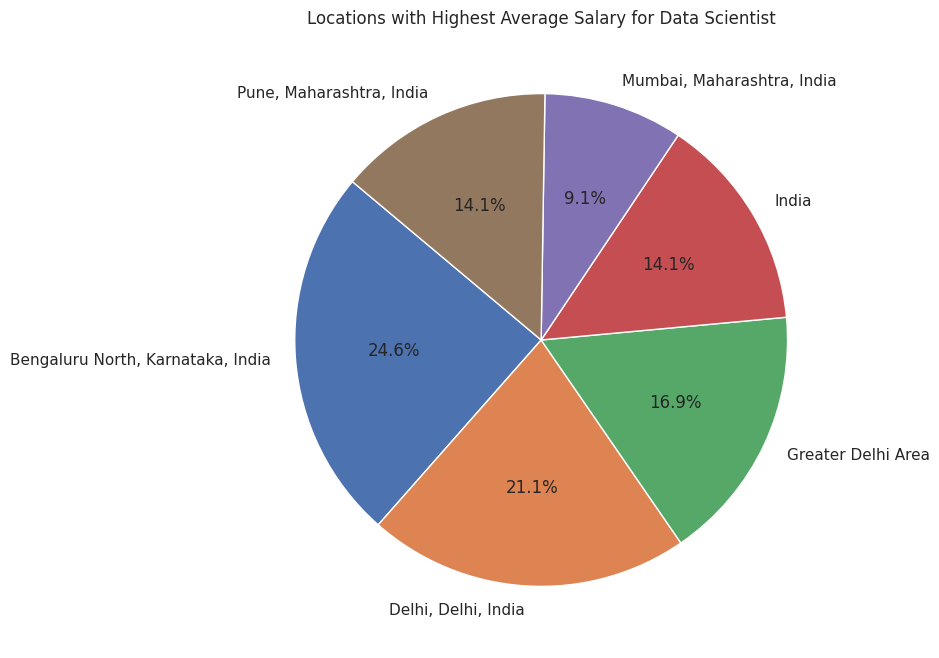

In [ ]:
#Change this to your desired job title
job_type = "Data Scientist"

# Filter the DataFrame for the specified job type
filtered_df = column_cleaned[column_cleaned['Job Title'] == job_type]

# Calculate the average salary for each location
average_salary_by_location = filtered_df.groupby('Location')['Salary'].mean()

# Drop locations with NaN (missing) values
average_salary_by_location = average_salary_by_location.dropna()

# Create a pie chart for the top locations with the highest average salary
plt.figure(figsize=(8, 8))
plt.pie(average_salary_by_location, labels=average_salary_by_location.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Locations with Highest Average Salary for {job_type}')
plt.show()